In [17]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Load the dataset


In [18]:
import requests

def download(url, filename):
    try:
        print(f"📥 Downloading from {url} ...")
        response = requests.get(url)
        response.raise_for_status()  # Raise error for bad responses

        with open(filename, "wb") as f:
            f.write(response.content)

        print(f"✅ File downloaded successfully and saved as '{filename}'")

    except requests.exceptions.RequestException as e:
        print(f"⚠️ Error during download: {e}")

# File details
filepath = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv"
file_name = "housing.csv"

# Run
download(filepath, file_name)


📥 Downloading from https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv ...
✅ File downloaded successfully and saved as 'housing.csv'


Question 1


In [ ]:

# Load the dataset (this defines 'df')
df = pd.read_csv("housing.csv")
# Display data types
print(df.dtypes)

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [ ]:

# Display statistical summary
print(df.describe())

        Unnamed: 0            id         price      bedrooms     bathrooms  \
count  21613.00000  2.161300e+04  2.161300e+04  21600.000000  21603.000000   
mean   10806.00000  4.580302e+09  5.400881e+05      3.372870      2.115736   
std     6239.28002  2.876566e+09  3.671272e+05      0.926657      0.768996   
min        0.00000  1.000102e+06  7.500000e+04      1.000000      0.500000   
25%     5403.00000  2.123049e+09  3.219500e+05      3.000000      1.750000   
50%    10806.00000  3.904930e+09  4.500000e+05      3.000000      2.250000   
75%    16209.00000  7.308900e+09  6.450000e+05      4.000000      2.500000   
max    21612.00000  9.900000e+09  7.700000e+06     33.000000      8.000000   

        sqft_living      sqft_lot        floors    waterfront          view  \
count  21613.000000  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean    2079.899736  1.510697e+04      1.494309      0.007542      0.234303   
std      918.440897  4.142051e+04      0.539989      0.08651

Question 2

In [21]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


In [23]:
mean = df['bedrooms'].mean()
df['bedrooms'].replace(np.nan, mean, inplace=True)

mean = df['bathrooms'].mean()
df['bathrooms'].replace(np.nan, mean, inplace=True)

print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


C:\Users\user\AppData\Local\Temp\ipykernel_5064\3398954699.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bedrooms'].replace(np.nan, mean, inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_5064\3398954699.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

Question 3

In [24]:
floors_count = df['floors'].value_counts().to_frame()
floors_count

,count
floors,
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


Question 4

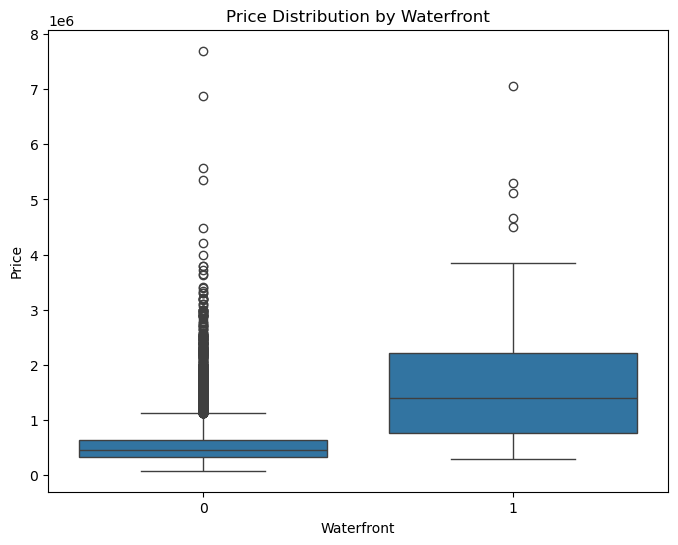

In [25]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='waterfront', y='price', data=df)
plt.title('Price Distribution by Waterfront')
plt.xlabel('Waterfront')
plt.ylabel('Price')
plt.show()

Question 5

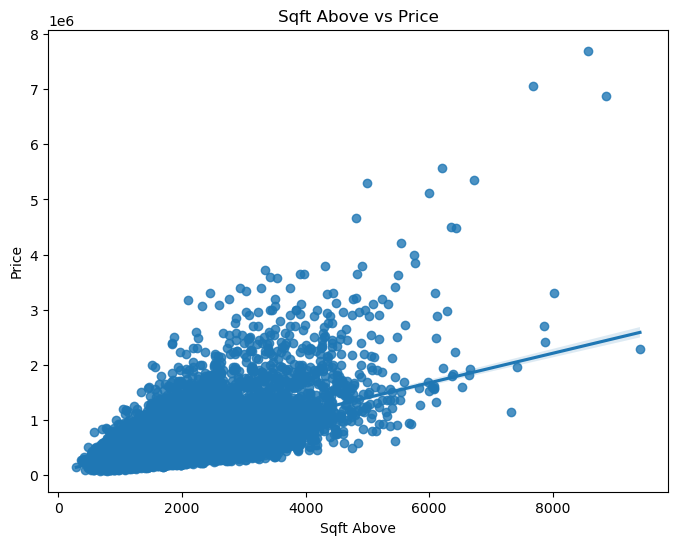

In [26]:
plt.figure(figsize=(8, 6))
sns.regplot(x='sqft_above', y='price', data=df)
plt.title('Sqft Above vs Price')
plt.xlabel('Sqft Above')
plt.ylabel('Price')
plt.show()

Find correlations with price.

In [27]:
df_numeric = df.select_dtypes(include=[np.number])
df_numeric.corr()['price'].sort_values()

zipcode         -0.053203
id              -0.016762
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308350
sqft_basement    0.323816
view             0.397293
bathrooms        0.525138
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

Fit a linear regression with 'long'.

In [28]:
X = df[['long']]
Y = df['price']
lm = LinearRegression()
lm.fit(X, Y)
print(lm.score(X, Y))

0.00046769430149007363


Question 6

In [29]:
X_simple = df[['sqft_living']]
Y = df['price']
lm_simple = LinearRegression()
lm_simple.fit(X_simple, Y)
r2_simple = lm_simple.score(X_simple, Y)
print(r2_simple)

0.4928532179037931


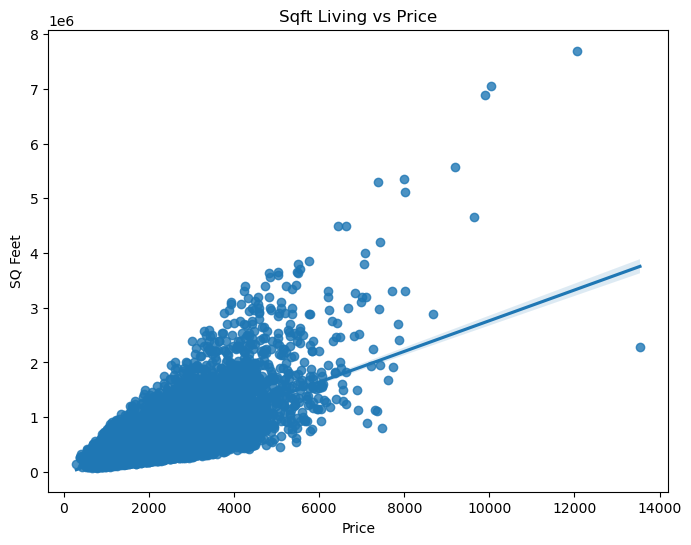

In [40]:
plt.figure(figsize=(8, 6))
sns.regplot(x='sqft_living', y='price', data=df)
plt.title('Sqft Living vs Price')
plt.xlabel('Price')
plt.ylabel('SQ Feet')
plt.show()

Question 7

In [31]:
features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement", "view", "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"]
X_multi = df[features]
lm_multi = LinearRegression()
lm_multi.fit(X_multi, Y)
r2_multi = lm_multi.score(X_multi, Y)
print(r2_multi)

0.6577151058279331


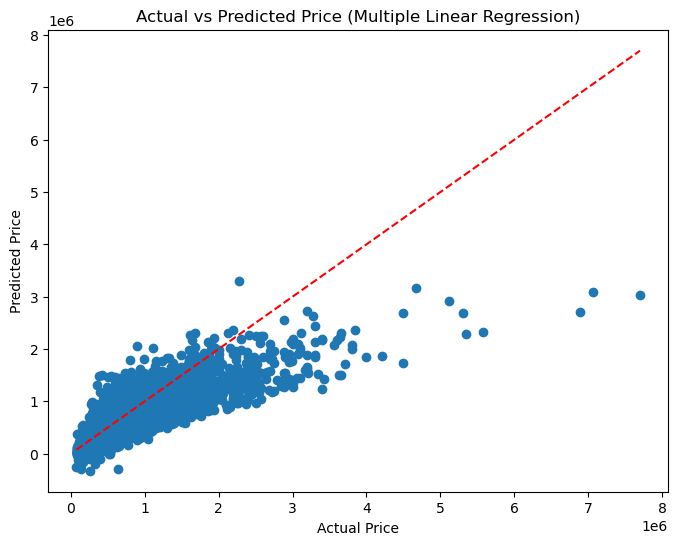

In [44]:
y_pred_multi = lm_multi.predict(X_multi)
plt.figure(figsize=(8, 6))
plt.scatter(Y, y_pred_multi)
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], color='red', linestyle='--')
plt.title('Actual vs Predicted Price (Multiple Linear Regression)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

In [ ]:
Question 8

In [34]:
Input = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]
pipe = Pipeline(Input)
pipe.fit(X_multi, Y)
r2_pipe = pipe.score(X_multi, Y)
print(r2_pipe)

0.7513467656307783


Module 5: Model Evaluation and Refinement

In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
print("done")

done


In [36]:
features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement", "view", "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"]
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)

print("number of test samples:", x_test.shape[0])
print("number of training samples:", x_train.shape[0])

number of test samples: 3242
number of training samples: 18371


Question 9

In [37]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.1)
ridge.fit(x_train, y_train)
r2_ridge = ridge.score(x_test, y_test)
print(r2_ridge)

0.6480374087702243


Question 10

In [38]:
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

ridge_poly = Ridge(alpha=0.1)
ridge_poly.fit(x_train_poly, y_train)
r2_ridge_poly = ridge_poly.score(x_test_poly, y_test)
print(r2_ridge_poly)

0.7004432066573703


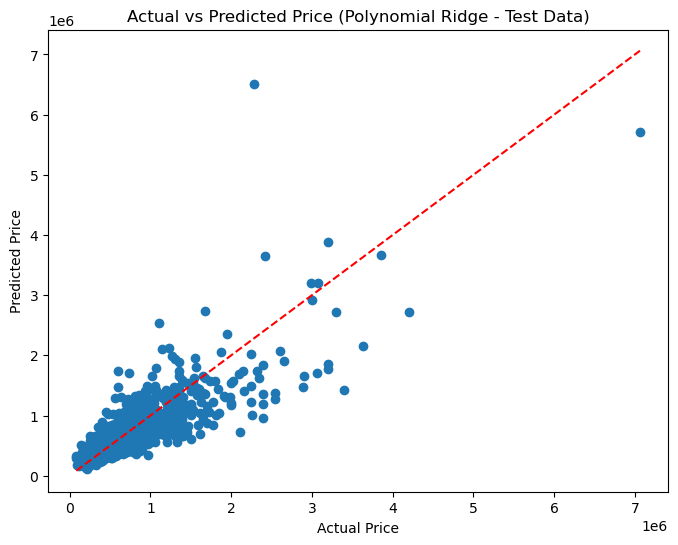

In [47]:
y_pred_ridge_poly = ridge_poly.predict(x_test_poly)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_ridge_poly)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Actual vs Predicted Price (Polynomial Ridge - Test Data)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

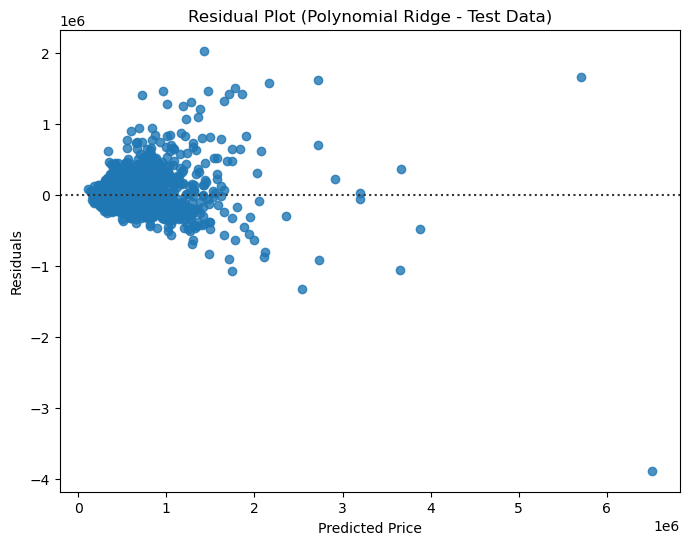

In [48]:
residuals_ridge_poly = y_test - y_pred_ridge_poly
plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred_ridge_poly, y=residuals_ridge_poly)
plt.title('Residual Plot (Polynomial Ridge - Test Data)')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.show()